In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, recall_score, precision_score, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier


In [2]:
df=pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
df.shape

(284807, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
df.duplicated().sum()


1081

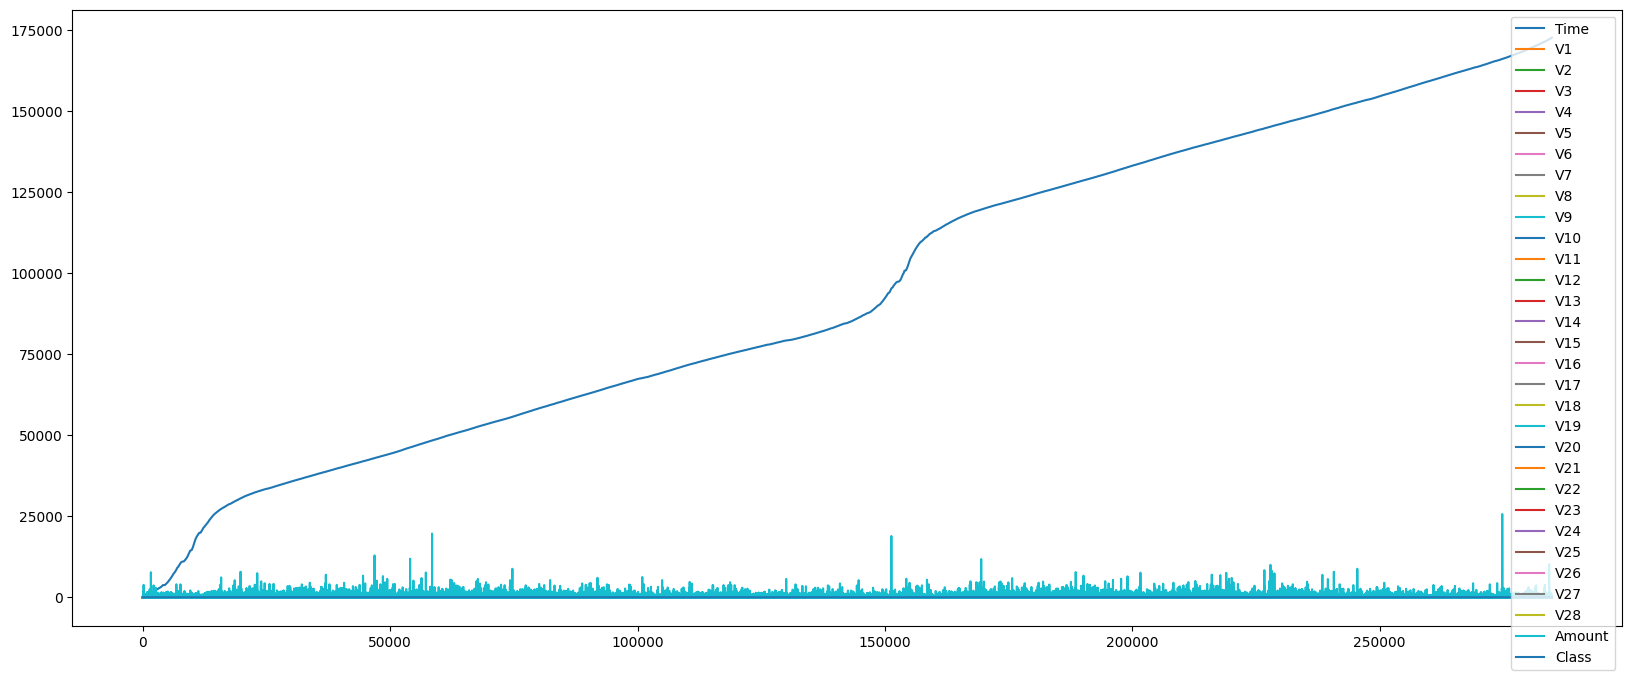

In [10]:
df.plot(figsize=(20,8))
plt.show()

Class
0    284315
1       492
Name: count, dtype: int64

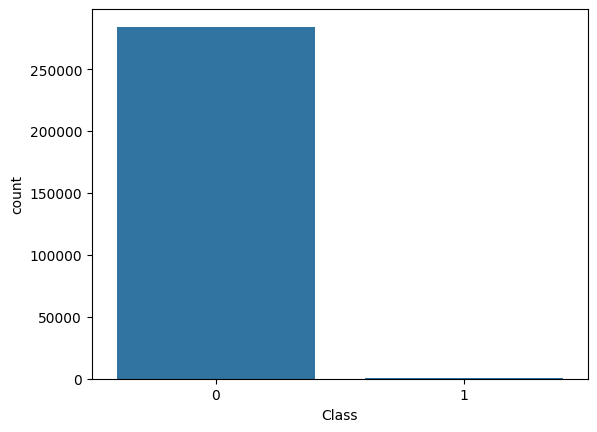

In [11]:
sns.countplot(x = "Class", data = df)
df.loc[:, 'Class'].value_counts()

In [12]:
V_col = df[['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28']]
V_col.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


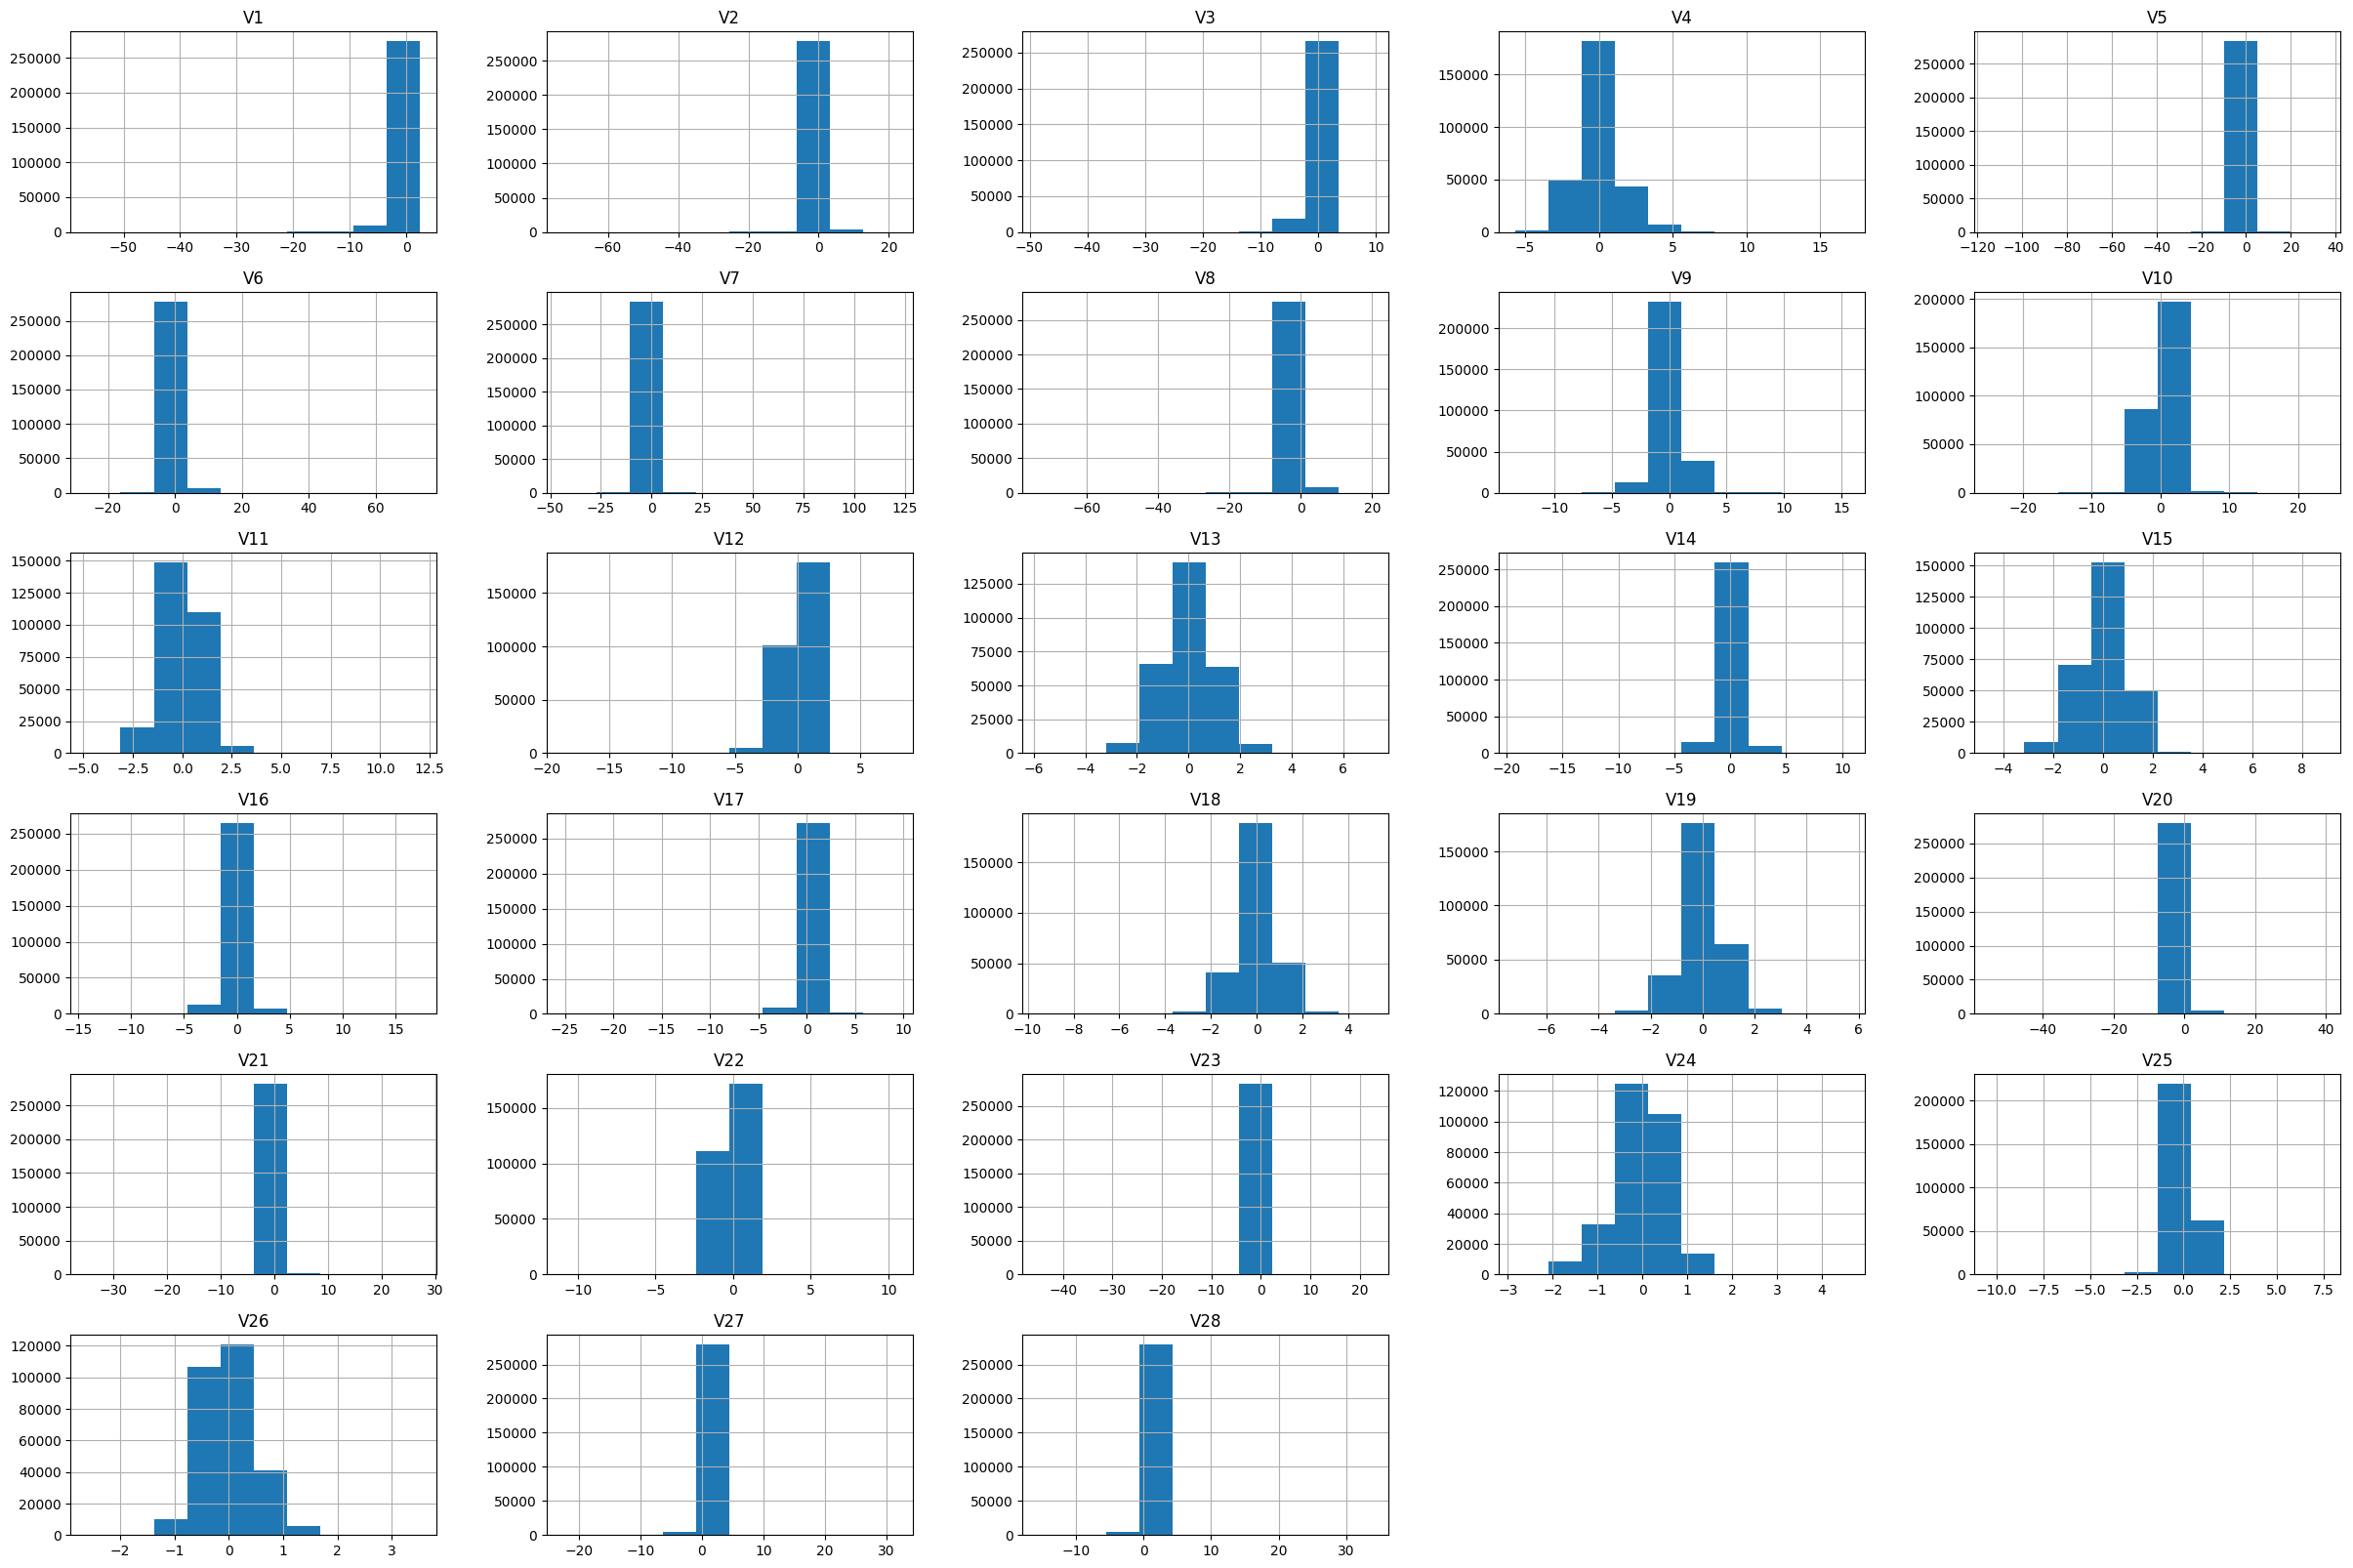

In [13]:
V_col.hist(figsize=(30, 20))
plt.show()

In [14]:
Normal_transcations = len(df[df['Class']==1])
Fraud_transcations = len(df[df['Class']==0])
print("No. of normal transactions:",Normal_transcations)
print("NO. of fraud transcations:", Fraud_transcations)

No. of normal transactions: 492
NO. of fraud transcations: 284315


In [15]:
X = df.iloc[:, 1:29].values
Y = df.iloc[:, 30].values

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
print ("X train: ", len(X_train))
print("X test: ", len(X_test))
print("Y train: ", len(Y_train))
print("Y test: ", len(Y_test))

X train:  213605
X test:  71202
Y train:  213605
Y test:  71202


In [17]:
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, Y_train)


LogisticRegression(random_state=0)

In [18]:
y_pred = lr.predict(X_test)
lr.score(X_test, Y_test)
print('accuracy of training set: {:.4f}'.format(lr.score(X_train,Y_train)))
print('accuaracy of test set: {:.4f}'.format(lr.score(X_test, Y_test)))

accuracy of training set: 0.9992
accuaracy of test set: 0.9993


In [19]:
accuracy =  accuracy_score(Y_test, y_pred)
prec =  precision_score(Y_test, y_pred)
rec =  recall_score(Y_test, y_pred)
pre_rec = precision_recall_curve(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)

In [20]:
results = pd.DataFrame([['LogisticRegression', accuracy, prec, rec, pre_rec, f1]],
                       columns = ["Model", "accuracy", "precision", "recall", "precision_recall", "f1_score"])

In [21]:
results

,Model,accuracy,precision,recall,precision_recall,f1_score
0,LogisticRegression,0.999284,0.88764,0.658333,"([0.0016853459172495155, 0.8876404494382022, 1...",0.755981


[[71072    10]
 [   41    79]]


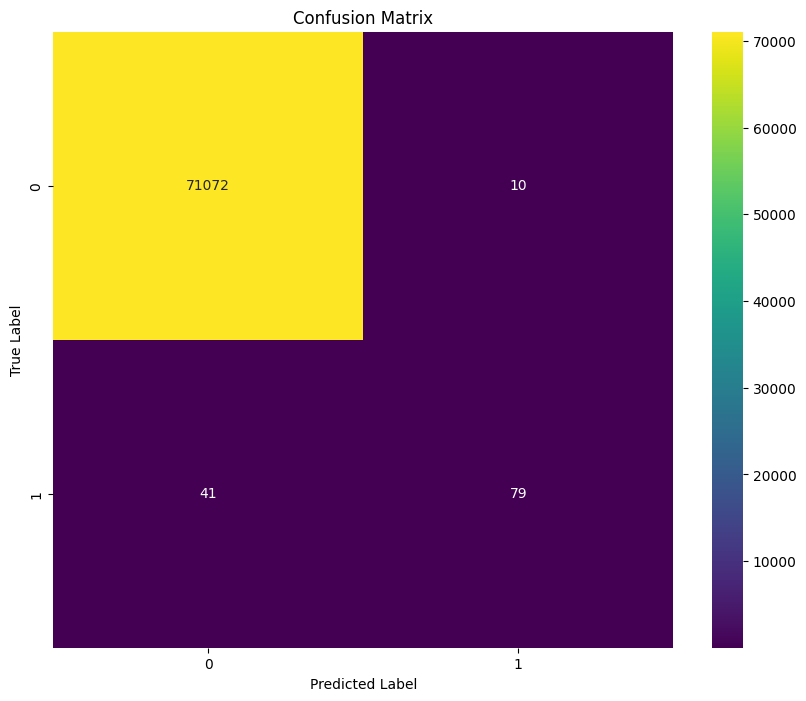

In [22]:
cm = confusion_matrix(Y_test, y_pred)
print(cm)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [23]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

In [24]:
y_pred = rf.predict(X_test)

In [25]:
acc = accuracy_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
prec = precision_score(Y_test, y_pred)
rec = recall_score(Y_test, y_pred)

In [26]:
model_results = pd.DataFrame([['Random Forest', acc, f1, prec, rec]],
                       columns = ["Model", "accuracy", "f1", "precision", "recall"])
results = pd.concat([results, model_results], ignore_index=True)

results

,Model,accuracy,precision,recall,precision_recall,f1_score,f1
0,LogisticRegression,0.999284,0.88764,0.658333,"([0.0016853459172495155, 0.8876404494382022, 1...",0.755981,NaN
1,Random Forest,0.999551,0.94000,0.783333,NaN,NaN,0.854545


[[71076     6]
 [   26    94]]


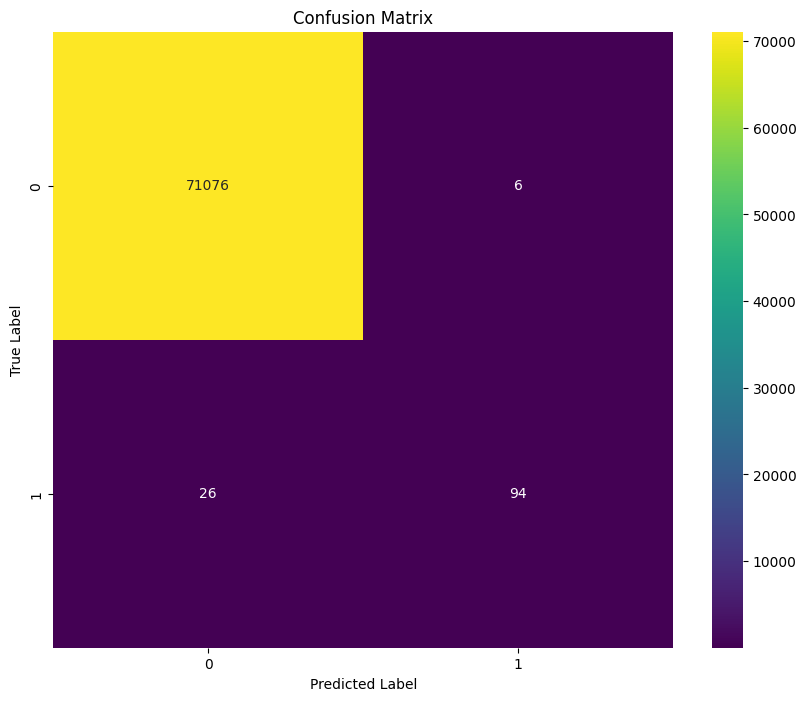

In [27]:
cm = confusion_matrix(Y_test, y_pred)
print(cm)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [28]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [29]:
y_dtc = classifier.predict(X_test)

In [30]:
classifier.score(X_test, Y_test)
print('accuracy of training set: {:.4f}'.format(classifier.score(X_train,Y_train)))
print('accuaracy of test set: {:.4f}'.format(classifier.score(X_test, Y_test)))

accuracy of training set: 1.0000
accuaracy of test set: 0.9992


In [31]:
classifier = DecisionTreeClassifier(max_depth = 4, random_state = 42)
classifier.fit(X_train,Y_train)
print('accuracy of training set: {:.4f}'.format(classifier.score(X_train,Y_train)))
print('accuaracy of test set: {:.4f}'.format(classifier.score(X_test, Y_test)))

accuracy of training set: 0.9995
accuaracy of test set: 0.9995


In [32]:
acc = accuracy_score(y_dtc, Y_test)
f1 = f1_score(y_dtc, Y_test)
prec = precision_score(y_dtc, Y_test)
rec = recall_score(y_dtc, Y_test)

In [33]:
results = pd.DataFrame([['KNeighboursClassifier', acc, prec, rec, pre_rec, f1]],
                       columns = ["Model", "accuracy", "precision", "recall", "precision_recall", "f1_score"])
results

,Model,accuracy,precision,recall,precision_recall,f1_score
0,KNeighboursClassifier,0.999199,0.808333,0.740458,"([0.0016853459172495155, 0.8876404494382022, 1...",0.772908


In [34]:
co_ma = confusion_matrix(y_dtc, Y_test)
print(co_ma)

[[71048    23]
 [   34    97]]


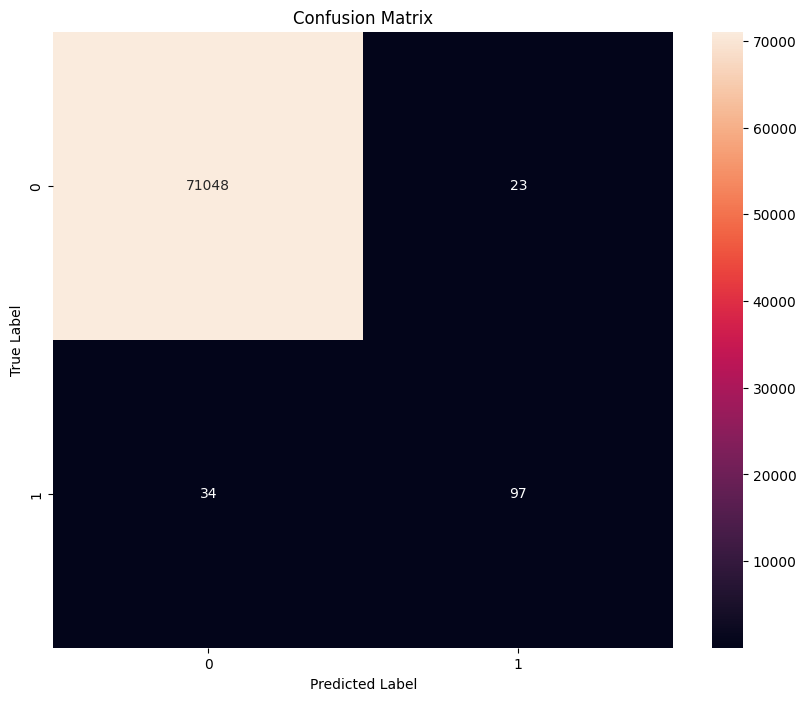

In [35]:
plt.figure(figsize=(10, 8))
sns.heatmap(co_ma, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()